## Homework 07: Conceptual exercises

### MACS 30100 Perspectives on Computational Modeling, Dr. Soltoff

Ellen Hsieh

25 Feb 2019

In [1]:
import random
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

### Backfitting approach for GAMs

#### a.

In [2]:
np.random.seed(124)

# generate the data for toy example with p=2, n=100
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
beta0 = 4
beta1 = 3.3
beta2 = 2.75
epsilon = np.random.normal(0, 1, 100)

Y = beta0 + beta1 * x1 + beta2 * x2 + epsilon

#### b - c.

In [3]:
# initialize beta hat 1
bhat_1 = 2

# fit the model keeping beta hat 1 fixed
a = Y - bhat_1 * x1
model1 = sm.OLS(a, sm.add_constant(x2)).fit()
print(model1.summary(xname=['const', 'x2']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           6.57e-24
Time:                        22:47:21   Log-Likelihood:                -197.41
No. Observations:                 100   AIC:                             398.8
Df Residuals:                      98   BIC:                             404.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2399      0.176     24.091      0.0

#### d.

In [4]:
# fit the model keeping beta hat 2 fixed
bhat_2 = model1.params[1]
b = Y - bhat_2 * x2 
model2 = sm.OLS(b, sm.add_constant(x1)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1040.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.63e-54
Time:                        22:47:24   Log-Likelihood:                -145.21
No. Observations:                 100   AIC:                             294.4
Df Residuals:                      98   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0741      0.105     38.747      0.0

#### e.

In [5]:
# repeat (c) and (d) for 1000 times
bhat_0 = np.zeros(1000)
bhat_1 = np.zeros(1001)
bhat_2 = np.zeros(1000)
bhat_1[0] = 2

for i in range(1000):
    a = Y - bhat_1[i] * x1
    bhat_2[i] = sm.OLS(a, sm.add_constant(x2)).fit().params[1]
    
    b = Y - bhat_2[i] * x2 
    bhat_0[i] = sm.OLS(b, sm.add_constant(x1)).fit().params[0]
    bhat_1[i+1] = sm.OLS(b, sm.add_constant(x1)).fit().params[1]    

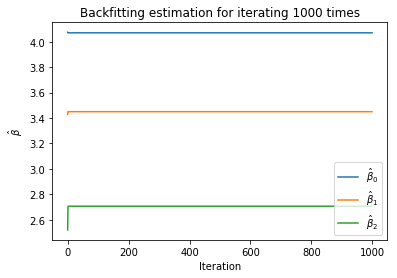

In [6]:
# plot the values of beta 0, beta 1, beta 2 
plt.plot(bhat_0, label=r'$\hat \beta_0$')
plt.plot(bhat_1[1:], label=r'$\hat \beta_1$')
plt.plot(bhat_2, label=r'$\hat \beta_2$')
plt.title('Backfitting estimation for iterating 1000 times')
plt.xlabel('Iteration')
plt.ylabel(r'$\hat \beta$')
plt.legend(loc='lower right')
plt.show()

#### f.

In [7]:
# using multiple linear regression (x1, x2) to predict Y
x1= x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
xs = np.concatenate((x1, x2), axis=1)
model = sm.OLS(Y, sm.add_constant(xs)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     737.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.09e-59
Time:                        22:47:30   Log-Likelihood:                -143.78
No. Observations:                 100   AIC:                             293.6
Df Residuals:                      97   BIC:                             301.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0695      0.104     39.046      0.0

In [8]:
# get the parameters from multiple linear regression model
beta_hat_0 = model.params[0]
beta_hat_1 = model.params[1]
beta_hat_2 = model.params[2]

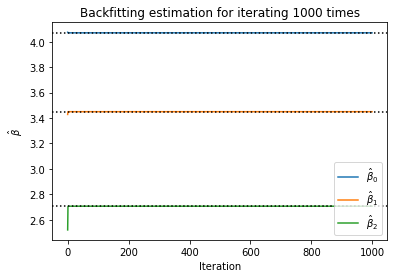

In [9]:
# plot multiple linear regression coefficient estimates
plt.plot(bhat_0, label=r'$\hat \beta_0$')
plt.plot(bhat_1[1:], label=r'$\hat \beta_1$')
plt.plot(bhat_2, label=r'$\hat \beta_2$')
plt.axhline(y=beta_hat_0 ,color='k', linestyle=':')
plt.axhline(y=beta_hat_1 ,color='k', linestyle=':')
plt.axhline(y=beta_hat_2 ,color='k', linestyle=':')
plt.title('Backfitting estimation for iterating 1000 times')
plt.xlabel('Iteration')
plt.ylabel(r'$\hat \beta$')
plt.legend(loc='lower right')
plt.show()

#### g.

In [10]:
# create the beta dataframe to show beta 0, beta 1, beta 2
beta_df = pd.DataFrame({'beta_0':bhat_0, 'beta_1':bhat_1[1:], 'beta_2':bhat_2})
beta_df[:10]

,beta_0,beta_1,beta_2
0,4.074061,3.427756,2.519968
1,4.069581,3.449237,2.703612
2,4.069514,3.449560,2.706375
3,4.069513,3.449565,2.706417
4,4.069513,3.449565,2.706417
5,4.069513,3.449565,2.706417
6,4.069513,3.449565,2.706417
7,4.069513,3.449565,2.706417
8,4.069513,3.449565,2.706417
9,4.069513,3.449565,2.706417


2 backfitting iterations seems to sufficient for this data set.

### Backfitting with large $p$

In [11]:
# generate the data for toy example iwth p=100, n=1000 
Xs = np.random.normal(0, 1, (1000, 100))
beta = np.random.normal(0, 1, 100)
epsilon = np.random.normal(0, 1, 1000)
Y = np.dot(Xs, beta) + epsilon

In [12]:
# calcualte the MSE for each number of iteration
beta_lst = []
mse_lst = []
beta_lst.append(beta)
for i in range(100):
    beta_tmp = beta_lst[i]
    for j in range(100):
        a = Y - np.dot(Xs, beta_tmp) + beta_tmp[j] * Xs[:,j]
        model = sm.OLS(a, sm.add_constant(Xs[:,j])).fit()
        beta_tmp[j] = model.params[1]
    beta_lst.append(beta_tmp)
    mse_lst.append(mse(Y, np.dot(Xs, beta_tmp)))

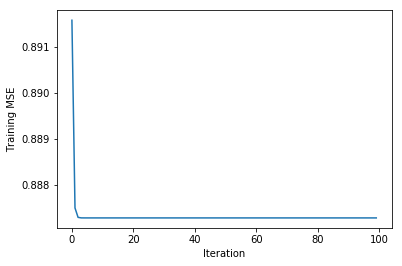

In [13]:
# plot the backfitting iteration with p=100, n=1000
plt.plot(np.arange(100), mse_lst)
plt.xlabel('Iteration')
plt.ylabel('Training MSE')
plt.show()

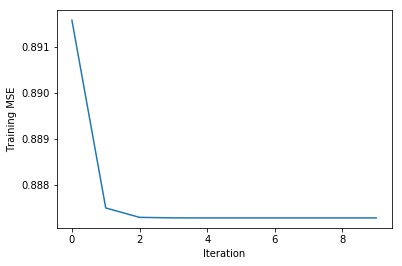

In [14]:
# plot the first 10 backfitting iteration with p=100, n=1000
plt.plot(np.arange(10), mse_lst[:10])
plt.xlabel('Iteration')
plt.ylabel('Training MSE')
plt.show()

From the above plot, it seems that 4 iterations is sufficient to lower the MSE of the multiple regression coefficient estimates. Even with a large number of predictors, backfitting estimation is pretty effificent.